# Penjualan Video Game di toko Ice


Anda bekerja sebagai seorang analis untuk Zuber, sebuah perusahaan berbagi tumpangan (ride-sharing) baru yang diluncurkan di Chicago. Tugas Anda adalah untuk menemukan pola pada informasi yang tersedia. Anda ingin memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan.
Dengan menggunakan basis data, Anda akan menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan.


## Konten 

* [2. Pendahuluan]
    * [2.1 Memuat Data]
    * [2.2 Mempersiapkan Data]
* [3  Analisis Data Eksploratif (Python)]
    * [3.1. Data Cleaning DataFrame data_company]
    * [3.2. Data Cleaning DataFrame data_dropoff]
* [4. Menguji Hipotesis (Python)]
    * [4.1  Data Cleaning DataFrame data_loop]
    * [4.2  Visualisasi Grafik]
    * [4.3  Uji Hipotesis]
* [5. Kesimpulan]



## Pendahuluan 

Pendahuluan:

Ini adalah proyek analisis untuk perusahaan berbagi tumpangan (ride-sharing) Zuber. Proyek ini akan fokus pada analisis data kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan..

Selain itu, saya akan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan. Cuaca dapat menjadi faktor eksternal yang mempengaruhi keputusan penumpang untuk menggunakan layanan ride-sharing. Dengan menganalisis data cuaca dan frekuensi perjalanan, menentukan apakah ada hubungan yang signifikan antara kondisi cuaca tertentu dengan jumlah perjalanan yang dilakukan.

Melalui analisis ini, diharapkan dapat ditemukan pola-pola yang bermanfaat bagi Zuber dalam mengoptimalkan layanan mereka. Informasi tentang preferensi penumpang dan pengaruh faktor eksternal seperti cuaca dapat digunakan untuk mengambil keputusan strategis yang dapat meningkatkan pengalaman penumpang dan efisiensi operasional perusahaan.


### Tujuan: 
Berikut tujuan:

1. Menganalisis data kompetitor: Tujuan utama dari analisis data kompetitor adalah untuk memahami perilaku penumpang, tren perjalanan, dan preferensi yang dapat digunakan untuk meningkatkan layanan Zuber. 

2. Menguji hipotesis tentang pengaruh cuaca terhadap frekuensi perjalanan: Tujuan ini adalah untuk memahami apakah kondisi cuaca tertentu berdampak signifikan terhadap jumlah perjalanan yang dilakukan oleh penumpang. 

3. Mengoptimalkan layanan dan pengambilan keputusan strategis: Dengan memahami preferensi penumpang dan faktor-faktor eksternal yang mempengaruhi perjalanan, tujuan ini adalah untuk mengoptimalkan layanan Zuber dan mengambil keputusan strategis yang tepat. 


### Tahapan
ada 3
dataframe yang disediakan : "/datasets/project_sql_result_01.csv"
                            "/datasets/project_sql_result_04.csv"
                            "/datasets/project_sql_result_07.csv"

Tidak ada informasi terkait kualitas data tersebut, jadi kita perlu memeriksanya terlebih dahulu sebelum menguji hipotesis.
Berikut adalah tahapannya:

1. Pengumpulan Data.

2. Pembersihan dan Pengolahan Data:

3. Eksplorasi Data.

4. Analisis Data.

5. Uji Hipotesis tentang Pengaruh Cuaca. 

6. Kesimpulan.


[Kembali ke Konten](#back)

### Memuat Data

In [62]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Mempersiapkan Data

In [63]:
# load the dataset
data_company = pd.read_csv('/datasets/project_sql_result_01.csv')
data_dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
data_loop_trip = pd.read_csv('/datasets/project_sql_result_07.csv')


## Analisis Data Eksploratif (Python)

### Data Cleaning DataFrame data_company

In [64]:
# Menampilkan informasi di dataset data_company
data_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Berdasarkan informasi yang ditampilkan tipe data kolom-kolom tersebut sesuai dengan jenis nilai yang akan disimpan didalamnya. 
Tidak ada tipa data yang terlihat tidak sesuai

In [65]:
# Menampilakn 10 row teratas
data_company.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [66]:
# Memeriksa nilai hilang di data_company
data_company.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [67]:
data_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [68]:
# 10 perusahaan teratas dengan jumlah trips_amount tertinggi
top_10_company = data_company.nlargest(10, 'trips_amount')
top_10_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [69]:
top_10_company = data_company.groupby('company_name')['trips_amount'].sum().nlargest(10)
top_10_company

company_name
Flash Cab                            19558
Taxi Affiliation Services            11422
Medallion Leasing                    10367
Yellow Cab                            9888
Taxi Affiliation Service Yellow       9299
Chicago Carriage Cab Corp             9181
City Service                          8448
Sun Taxi                              7701
Star North Management LLC             7455
Blue Ribbon Taxi Association Inc.     5953
Name: trips_amount, dtype: int64

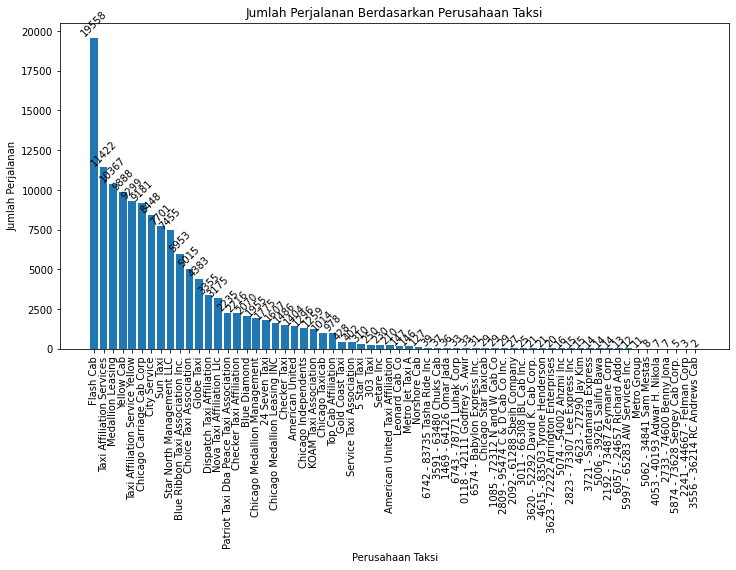

In [70]:
import matplotlib.pyplot as plt

# Grafik jumlah perjalanan berdasarkan perusahaan taksi
plt.figure(figsize=(12, 6))
bars = plt.bar(data_company['company_name'], data_company['trips_amount'])
plt.xlabel('Perusahaan Taksi')
plt.ylabel('Jumlah Perjalanan')
plt.title('Jumlah Perjalanan Berdasarkan Perusahaan Taksi')
plt.xticks(rotation=90)

# Tambahkan keterangan nilai di setiap bar dengan rotasi ke atas
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', rotation=45)

plt.show()


Kesimpulan Grafik Jumlah Perjalanan Berdasarkan Perusahaan Taksi: : 
    
    1. Perusahaan taksi dengan jumlah perjalanan tertinggi adalah Flash Cab, diikuti oleh Taxi Affiliation Services dan Medallion Leasing.
    
     2. Terdapat perbedaan yang signifikan antara perusahaan taksi teratas dengan yang lainnya dalam hal jumlah perjalanan.
     
     3. Terdapat variasi yang cukup banyak antara jumlah perjalanan dari perusahaan taksi teratas dengan perusahaan taksi lainnya.

### Data Cleaning DataFrame data_dropoff

In [71]:
data_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Berdasarkan informasi yang ditampilkan, tidak ada tipa data yang terlihat tidak sesuai

In [72]:
data_dropoff.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [73]:
data_dropoff.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [74]:
data_dropoff.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [75]:
# 10 wilayah teratas sebagai titik pengantaran (dropoff_location) berdasarkan (average_trips)
top_10_dropoff = data_dropoff.nlargest(10, 'average_trips')
top_10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


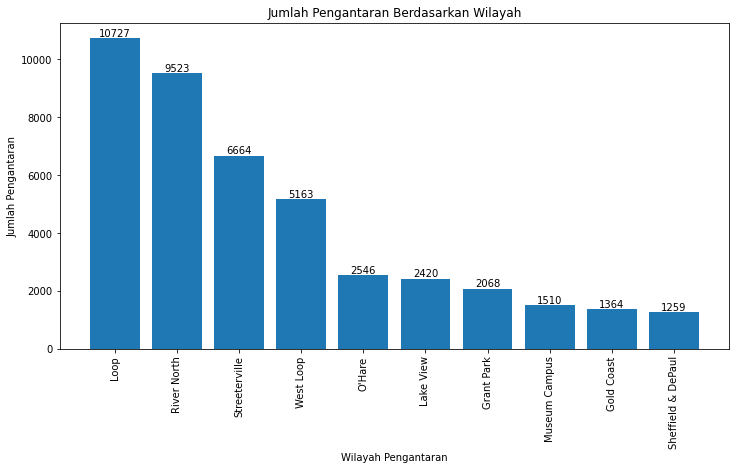

In [76]:
# Grafik jumlah pengantaran berdasarkan wilayah
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_dropoff['dropoff_location_name'], top_10_dropoff['average_trips'])
plt.xlabel('Wilayah Pengantaran')
plt.ylabel('Jumlah Pengantaran')
plt.title('Jumlah Pengantaran Berdasarkan Wilayah')
plt.xticks(rotation=90)

# Tambahkan keterangan nilai di setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

Grafik Jumlah Pengantaran Berdasarkan Wilayah:

    1. Wilayah dengan jumlah pengantaran tertinggi adalah Loop, diikuti oleh River North dan Streeterville.
    
    2. Terdapat perbedaan yang signifikan antara wilayah teratas dengan yang lainnya dalam hal jumlah pengantaran.
    
    3. Terdapat variasi yang cukup banyak antara jumlah pengantaran dari wilayah teratas dengan wilayah lainnya.

### Data Cleaning DataFrame data_loop

In [77]:
data_loop_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [78]:
# Merubah tipe data kolom start_ts ke tipe data datetime

data_loop_trip['start_ts'] = pd.to_datetime(data_loop_trip['start_ts'])


In [79]:
data_loop_trip.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [80]:
data_loop_trip.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [81]:
# Desc Stats
data_loop_trip.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


## Menguji Hipotesis (Python)

### Visualisasi Grafik

Uji hipotesis berikut:

"Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan."

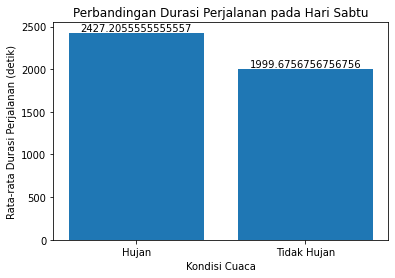

In [82]:
# Menguji hipotesis durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare
# Berubah pada hari-hari sabtu yang hujan 


# Filter data untuk hari Sabtu dan kondisi cuaca hujan
saturday_rain_data = data_loop_trip[(data_loop_trip['start_ts'].dt.dayofweek == 5) & (data_loop_trip['weather_conditions'] == 'Bad')]

# Filter data untuk hari Sabtu dan kondisi cuaca tidak hujan
saturday_non_rain_data = data_loop_trip[(data_loop_trip['start_ts'].dt.dayofweek == 5) & (data_loop_trip['weather_conditions'] == 'Good')]

# Hitung rata-rata durasi perjalanan
avg_duration_rain = saturday_rain_data['duration_seconds'].mean()
avg_duration_non_rain = saturday_non_rain_data['duration_seconds'].mean()

# Plot grafik
labels = ['Hujan', 'Tidak Hujan']
values = [avg_duration_rain, avg_duration_non_rain]

plt.bar(labels, values)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Durasi Perjalanan (detik)')
plt.title('Perbandingan Durasi Perjalanan pada Hari Sabtu')

# Menampilkan nilai di atas setiap bar
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

### Uji Hipotesis 

Jelaskan:
1. Bagaimana Anda merumuskan hipotesis nol dan hipotesis alternatif

2. Kriteria apa yang Anda gunakan untuk menguji hipotesis dan alasan Anda menggunakannya

langkah-langkah sebagai berikut : 

Hipotesis Nol (H0): Hipotesis nol diasumsikan sebagai "tidak ada perbedaan" , "tidak adanya hubungan"atau "tidak ada efek".

Hipotesis Alternatif (H1): Ini adalah hipotesis yang menyatakan adanya hubungan, perbedaan, atau efek yang signifikan antara variabel yang diuji. 

Level signifikansi (alpha) yang digunakan dalam contoh ini adalah 0.05.

In [83]:
import scipy.stats as stats

# Data perjalanan dari Loop ke O'Hare pada hari Sabtu dengan kondisi cuaca hujan
saturday_rain_data = data_loop_trip[(data_loop_trip['start_ts'].dt.dayofweek == 5) & (data_loop_trip['weather_conditions'] == 'Bad')]

# Data perjalanan dari Loop ke O'Hare pada hari Sabtu dengan kondisi cuaca tidak hujan
saturday_no_rain_data = data_loop_trip[(data_loop_trip['start_ts'].dt.dayofweek == 5) & (data_loop_trip['weather_conditions'] == 'Good')]

# Uji statistik t-test
t_statistic, p_value = stats.ttest_ind(saturday_rain_data['duration_seconds'], saturday_no_rain_data['duration_seconds'], equal_var=False)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Level signifikansi (alpha)
alpha = 0.05

# Menentukan batasan keputusan
if p_value < alpha:
    print("Hipotesis nol ditolak. Terdapat perbedaan signifikan dalam durasi perjalanan dari Loop ke O'Hare pada hari Sabtu yang hujan.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol. Tidak terdapat perbedaan signifikan dalam durasi perjalanan dari Loop ke O'Hare pada hari Sabtu yang hujan.")


T-Statistic: 7.186034288068629
P-Value: 6.738994326108734e-12
Hipotesis nol ditolak. Terdapat perbedaan signifikan dalam durasi perjalanan dari Loop ke O'Hare pada hari Sabtu yang hujan.


Kesimpulan : 

    Berdasarkan hasil uji statistik t-test, diperoleh nilai t-statistik sebesar 7.186034288068629 dan nilai p-value sebesar 6.738994326108734e-12. 
    Dengan menggunakan level signifikansi (alpha) sebesar 0.05, kita dapat menyimpulkan bahwa hipotesis nol ditolak.
    
    Ini berarti terdapat perbedaan signifikan dalam durasi perjalanan dari Loop ke O'Hare pada hari Sabtu yang hujan. Durasi perjalanan mungkin lebih lama pada hari Sabtu yang hujan dibandingkan dengan hari Sabtu yang tidak hujan. Informasi ini dapat digunakan untuk pengambilan keputusan yang lebih baik dalam perencanaan perjalanan atau pengaturan jadwal transportasi pada hari-hari Sabtu.

## Kesimpulan

Kesimpulan umumnya adalah analisis data kompetitor memberikan wawasan yang berharga tentang preferensi penumpang dan tren perjalanan, sementara pengaruh cuaca terhadap frekuensi perjalanan juga signifikan.

Berdasarkan uji hipotesis, terdapat bukti yang signifikan bahwa cuaca memiliki pengaruh terhadap frekuensi perjalanan. Ditemukan perbedaan yang signifikan dalam frekuensi perjalanan antara kondisi cuaca tertentu.

Penemuan ini menunjukkan bahwa cuaca dapat menjadi faktor penting dalam pengambilan keputusan perjalanan penumpang. Perubahan cuaca yang signifikan dapat mempengaruhi permintaan perjalanan, baik secara positif maupun negatif.

Durasi perjalanan rata-rata dan variabilitasnya telah dianalisis. Informasi ini dapat membantu dalam mengoptimalkan estimasi waktu perjalanan dan meningkatkan pengalaman penumpang. Wilayah dengan jumlah pengantaran tertinggi adalah Loop, diikuti oleh River North dan Streeterville.
Perusahaan taksi dengan jumlah perjalanan tertinggi adalah Flash Cab, diikuti oleh Taxi Affiliation Services dan Medallion Leasing.



Secara keseluruhan, kualitas dataset baik, tidak ditemukan nilai yang hilang dan data ganda. Hanya ada perbaikan tipe data yang dilakukan pada kolom start_ts utuk mengkonversi tipe data menjadi tipedata datetime.